<a href="https://colab.research.google.com/github/Minhyuk03/KMOU_2-2_ML/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B54%EC%A3%BC_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 선형회귀

데이터 저장위치

In [ ]:
data_home = 'https://raw.githubusercontent.com/dknife/ML/main/data/'
lin_data = pd.read_csv(data_home+'pollution.csv')
print(lin_data)

       input  pollution
0   0.240557   4.858750
1   0.159731   4.471091
2   0.108295   4.341897
3   0.233770   3.586844
4   0.283235   3.678243
..       ...        ...
95  0.070824   4.851617
96  0.055300   4.912696
97  0.138229   5.516441
98  0.007205   5.661260
99  0.290294   3.169049

[100 rows x 2 columns]


데이터 시각화

<Axes: xlabel='input', ylabel='pollution'>

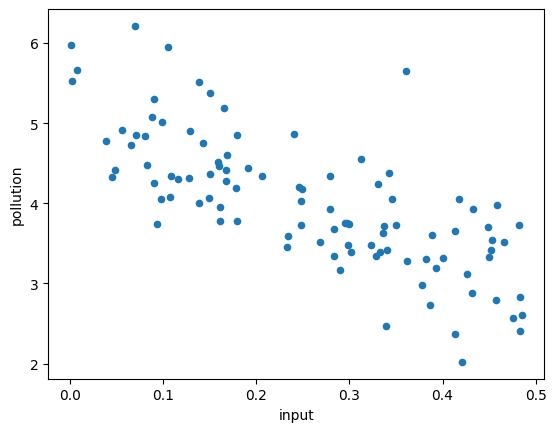

In [ ]:
lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')

가설 설정과 함수 정의

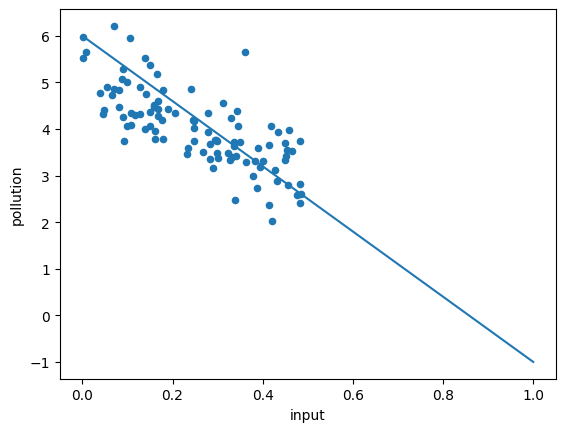

In [ ]:
w, b = -7, 6
x0, x1 = 0.0, 1.0
def h(x, w, b):
  return w*x + b

lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')
plt.plot([x0, x1],  [h(x0, w, b), h(x1, w, b)])

평균제곱오차계산

In [ ]:
y_hat = np.array([1.2, 2.1, 2.9, 4.1, 4.7, 6.3, 7.1, 7.7, 8.5, 10.1])
y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
diff_square = (y_hat - y)**2
e_mse = diff_square.sum() / len(y)
e_mse

np.float64(0.06099999999999996)

In [ ]:
from sklearn.metrics import mean_squared_error
print('Mean absolute error', mean_squared_error(y_hat,y))

Mean absolute error 0.06099999999999996


평균 절대 오차

In [ ]:
from sklearn.metrics import mean_absolute_error
print('Mean absolute error', mean_absolute_error(y_hat,y))

Mean absolute error 0.20999999999999988


최적기울기 찾기

In [ ]:
from sklearn.metrics import mean_squared_error as mse
x = np.array([1, 4.5, 9, 10, 13])
y = np.array([0, 0.2, 2.5, 5.4, 7.3])

w_list = np.arange(1.0, 0.2, -0.1)
for w in list(w_list): # w를 바꿔가며 계산
  y_hat = w * x
  print("w = {:.1f}, 평균제곱오차 = {:.2f}".format(w, mse(y_hat, y)))

w = 1.0, 평균제곱오차 = 23.08
w = 0.9, 평균제곱오차 = 15.86
w = 0.8, 평균제곱오차 = 10.13
w = 0.7, 평균제곱오차 = 5.89
w = 0.6, 평균제곱오차 = 3.13
w = 0.5, 평균제곱오차 = 1.85
w = 0.4, 평균제곱오차 = 2.06
w = 0.3, 평균제곱오차 = 3.75


# Scikit-Learn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model

In [ ]:
data_home = 'https://raw.githubusercontent.com/dknife/ML/main/data/'
lin_data = pd.read_csv(data_home+'pollution.csv')

In [ ]:
x = lin_data['input'].to_numpy()
y = lin_data['pollution'].to_numpy()
x = x[:, np.newaxis]
print(x)

[[0.24055707]
 [0.1597306 ]
 [0.10829455]
 [0.23377033]
 [0.28323537]
 [0.12808583]
 [0.34549075]
 [0.33271329]
 [0.09001426]
 [0.11620483]
 [0.20601359]
 [0.15000132]
 [0.39294774]
 [0.4209191 ]
 [0.33071579]
 [0.48175618]
 [0.26858081]
 [0.2328081 ]
 [0.45704999]
 [0.24569785]
 [0.38236759]
 [0.29856761]
 [0.29944705]
 [0.44841195]
 [0.09896587]
 [0.04793845]
 [0.15920226]
 [0.41791947]
 [0.16082931]
 [0.24851334]
 [0.47514699]
 [0.29708178]
 [0.1653657 ]
 [0.10529827]
 [0.0932346 ]
 [0.15023707]
 [0.48271145]
 [0.28364396]
 [0.07020281]
 [0.17768318]
 [0.46604517]
 [0.45860857]
 [0.27905958]
 [0.16777949]
 [0.32352937]
 [0.4329887 ]
 [0.32825247]
 [0.03894147]
 [0.33719318]
 [0.36048117]
 [0.08236935]
 [0.36232547]
 [0.33608776]
 [0.13852276]
 [0.41330502]
 [0.14950648]
 [0.24760616]
 [0.10715455]
 [0.00153907]
 [0.45324442]
 [0.16725705]
 [0.16088719]
 [0.00066376]
 [0.48323703]
 [0.0902836 ]
 [0.3775714 ]
 [0.3501837 ]
 [0.33927998]
 [0.45179427]
 [0.17890406]
 [0.16829187]
 [0.24

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(x,y)

LinearRegression()

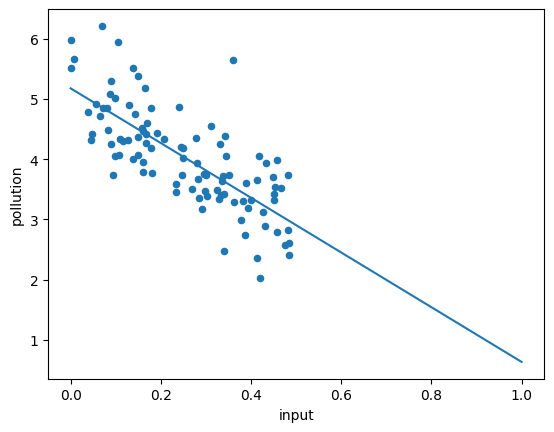

In [ ]:
lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')
y_pred = regr.predict([[0],[1]])
plt.plot([0,1], y_pred)

# 다변량 회귀

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
data_loc = 'https://raw.githubusercontent.com/dknife/ML/main/data/'
life = pd.read_csv(data_loc+'life_expectancy.csv')
life.head()

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
life = life[['Life expectancy', 'Year', 'Alcohol', 'Percentage expenditure', 'Total expenditure', 'Hepatitis B', 'Measles', 'Polio', 'BMI', 'GDP', 'Thinness 1-19 years', 'Thinness 5-9 years']]
life.dropna(inplace = True)
print(life.shape)
print(life.isnull().sum())

(1853, 12)
Life expectancy           0
Year                      0
Alcohol                   0
Percentage expenditure    0
Total expenditure         0
Hepatitis B               0
Measles                   0
Polio                     0
BMI                       0
GDP                       0
Thinness 1-19 years       0
Thinness 5-9 years        0
dtype: int64


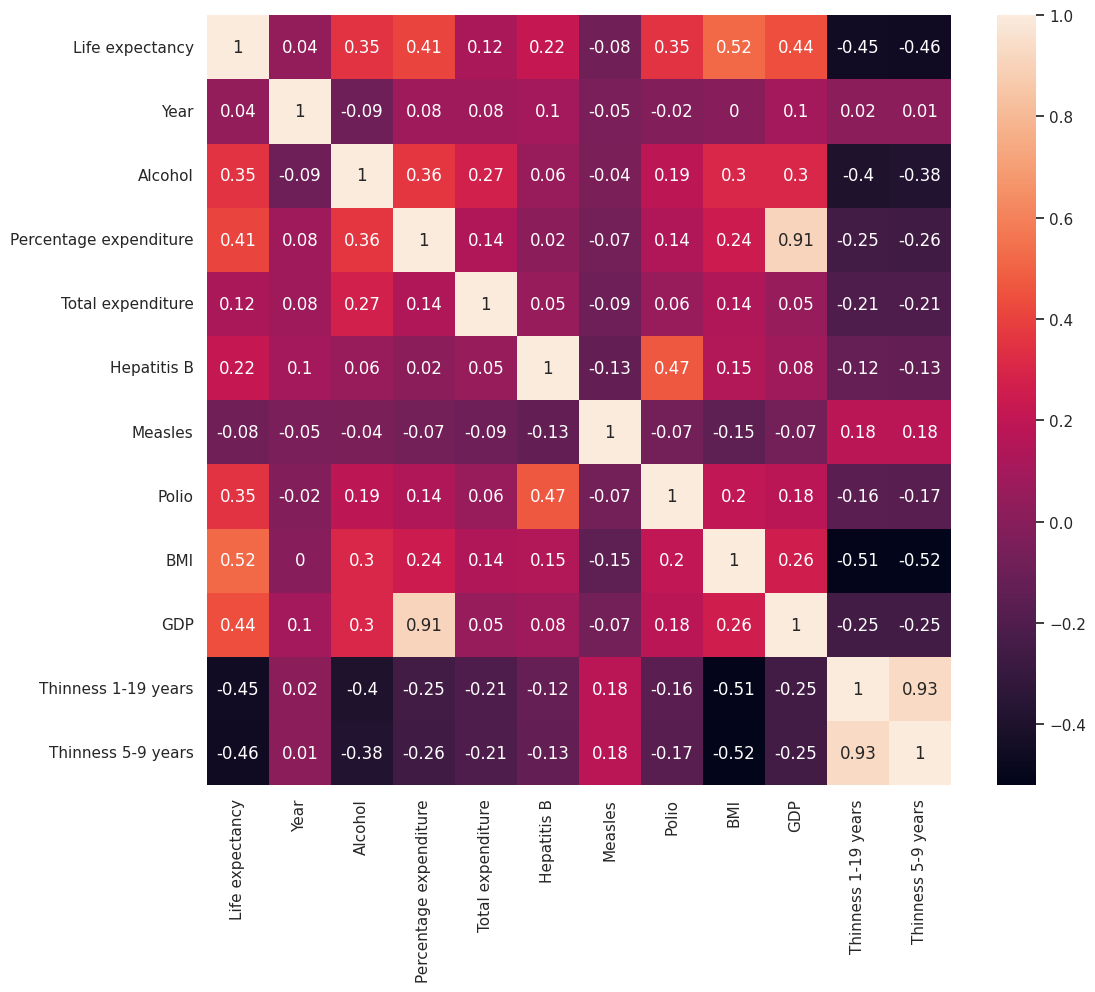

In [ ]:
sns.set(rc={'figure.figsize' : (12,10)}) #상관행렬 가시
correlation_matrix = life.corr().round(2) #상관행렬 생성
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

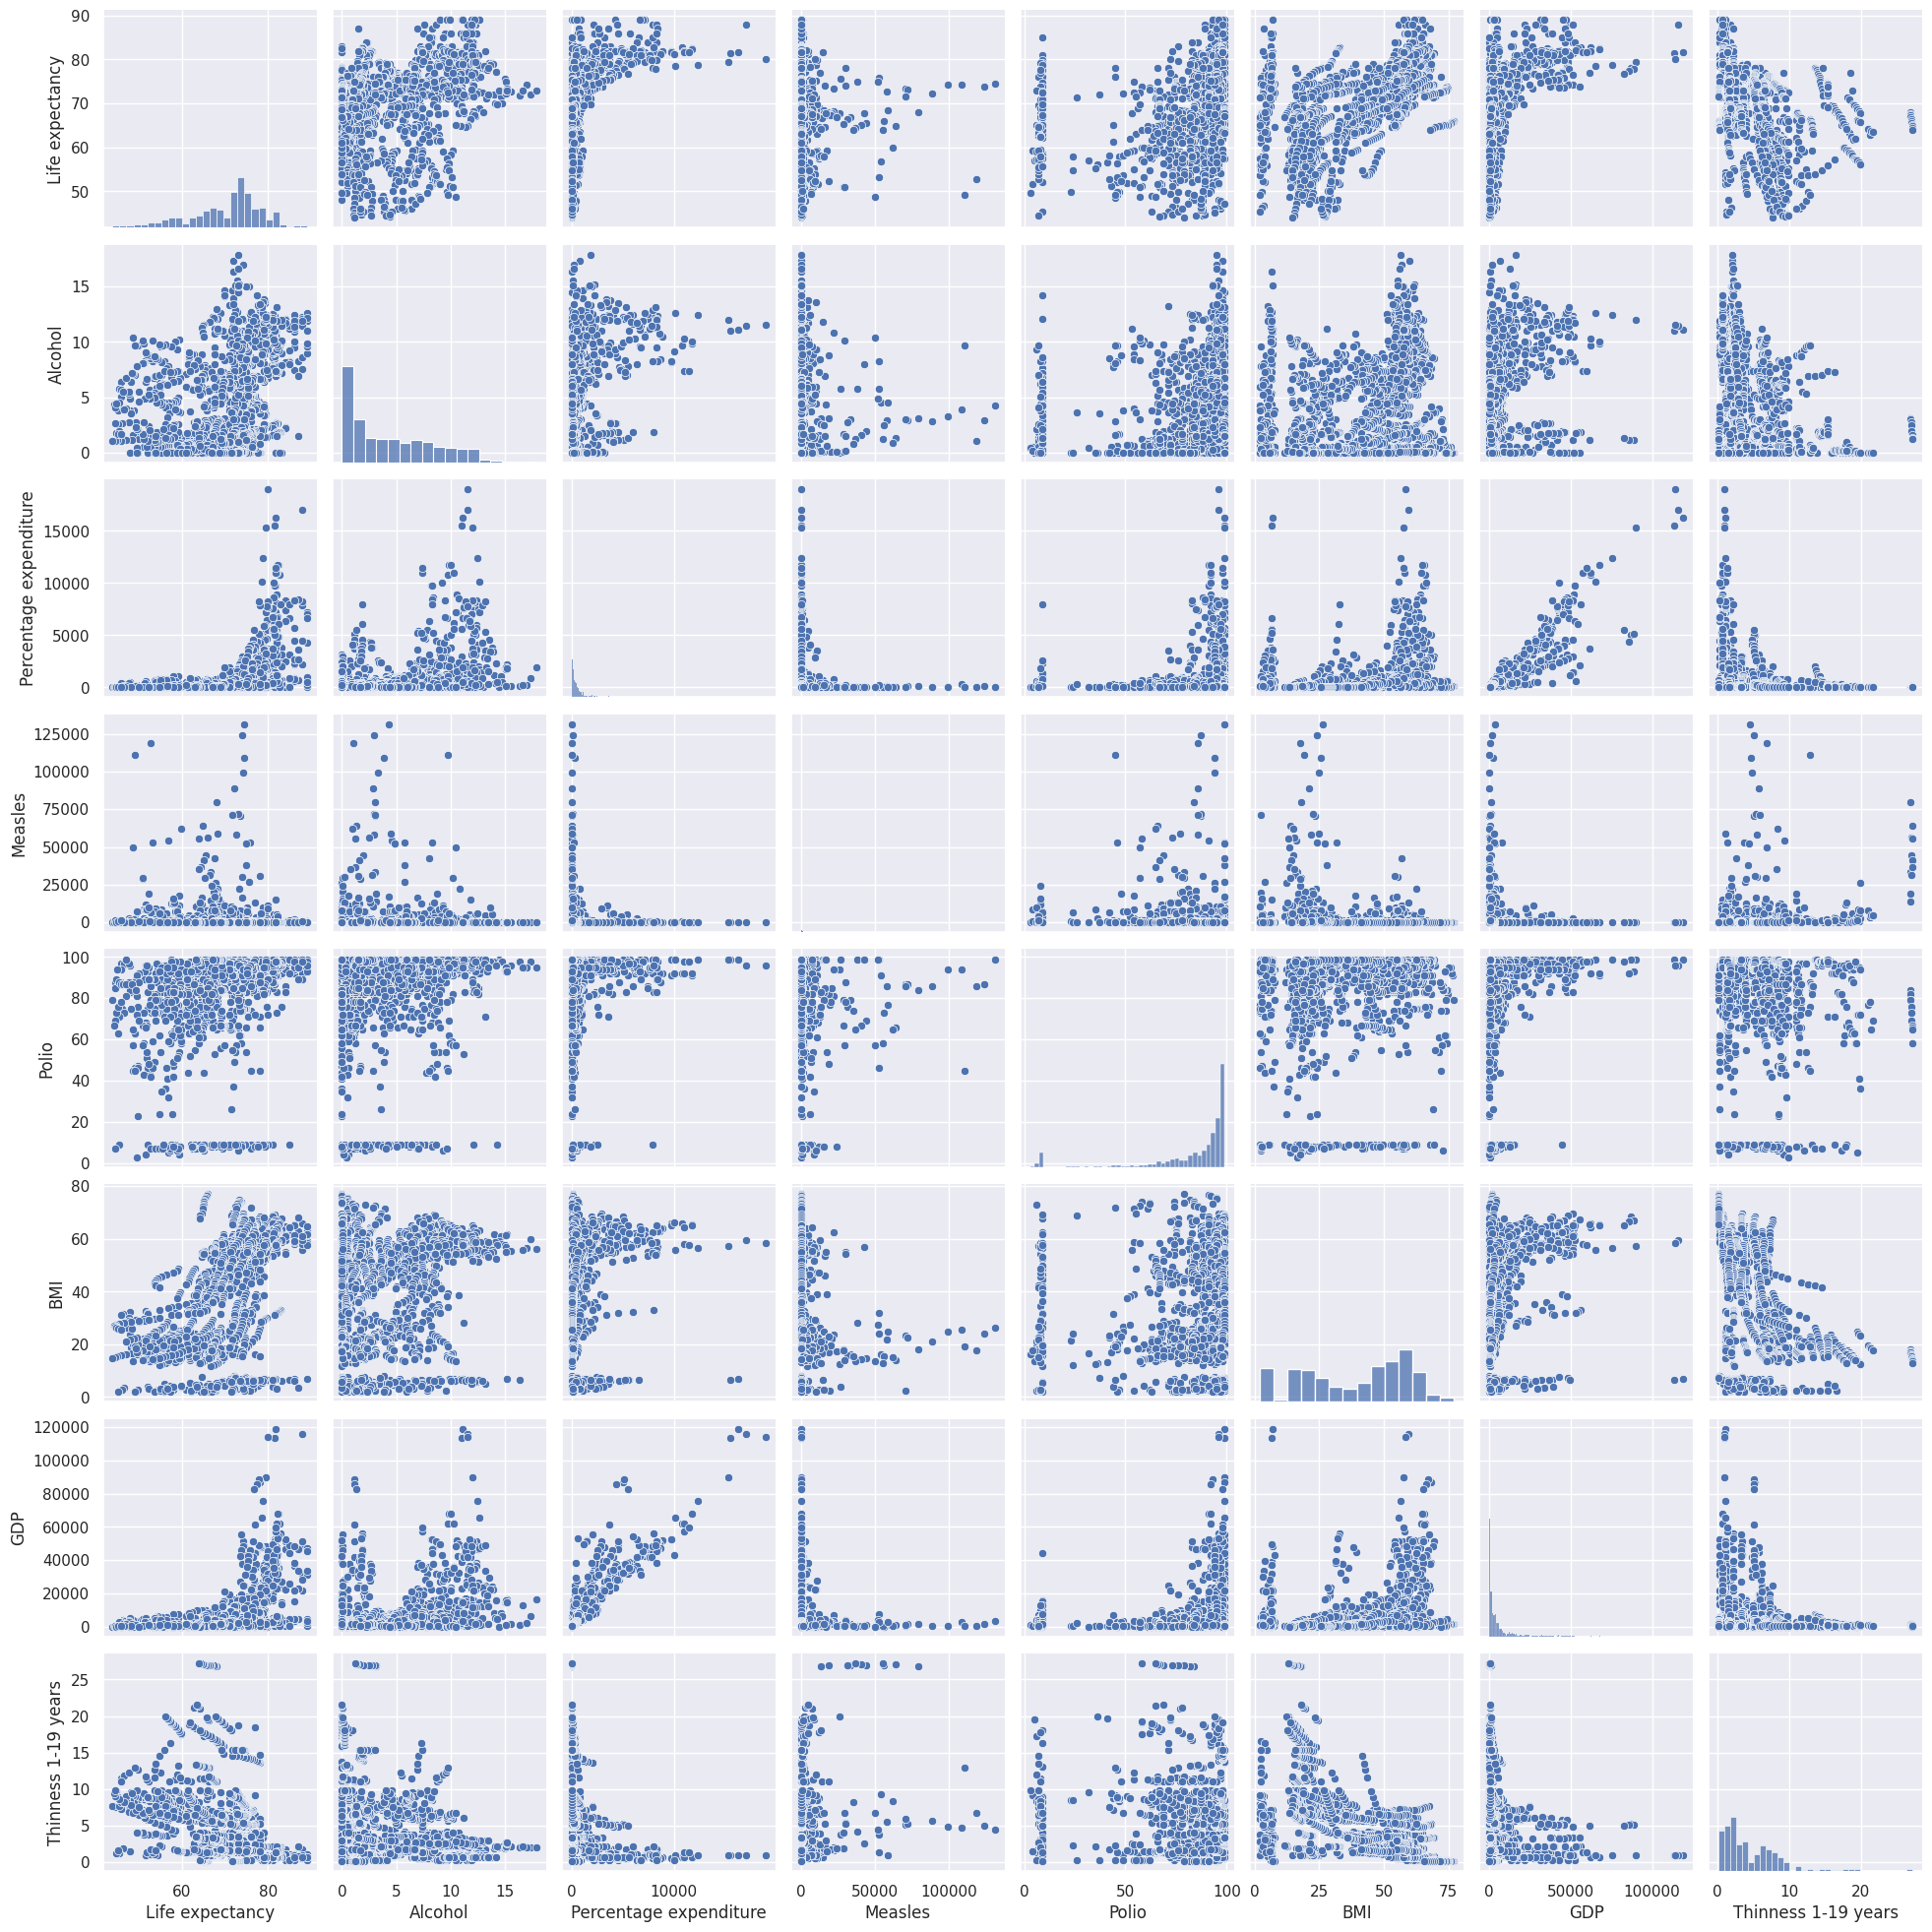

In [ ]:
sns.pairplot(life[['Life expectancy','Alcohol','Percentage expenditure','Measles','Polio','BMI','GDP','Thinness 1-19 years']])
plt.show()

In [ ]:
x = life[['Alcohol','Percentage expenditure','Polio','BMI','GDP','Thinness 1-19 years']]
y = life['Life expectancy']
print(x)
print(y)

      Alcohol  Percentage expenditure  Polio   BMI         GDP  \
0        0.01               71.279624    6.0  19.1  584.259210   
1        0.01               73.523582   58.0  18.6  612.696514   
2        0.01               73.219243   62.0  18.1  631.744976   
3        0.01               78.184215   67.0  17.6  669.959000   
4        0.01                7.097109   68.0  17.2   63.537231   
...       ...                     ...    ...   ...         ...   
2933     4.36                0.000000   67.0  27.1  454.366654   
2934     4.06                0.000000    7.0  26.7  453.351155   
2935     4.43                0.000000   73.0  26.3   57.348340   
2936     1.72                0.000000   76.0  25.9  548.587312   
2937     1.68                0.000000   78.0  25.5  547.358878   

      Thinness 1-19 years  
0                    17.2  
1                    17.5  
2                    17.7  
3                    17.9  
4                    18.2  
...                   ...  
2933       

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


In [ ]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

LinearRegression()

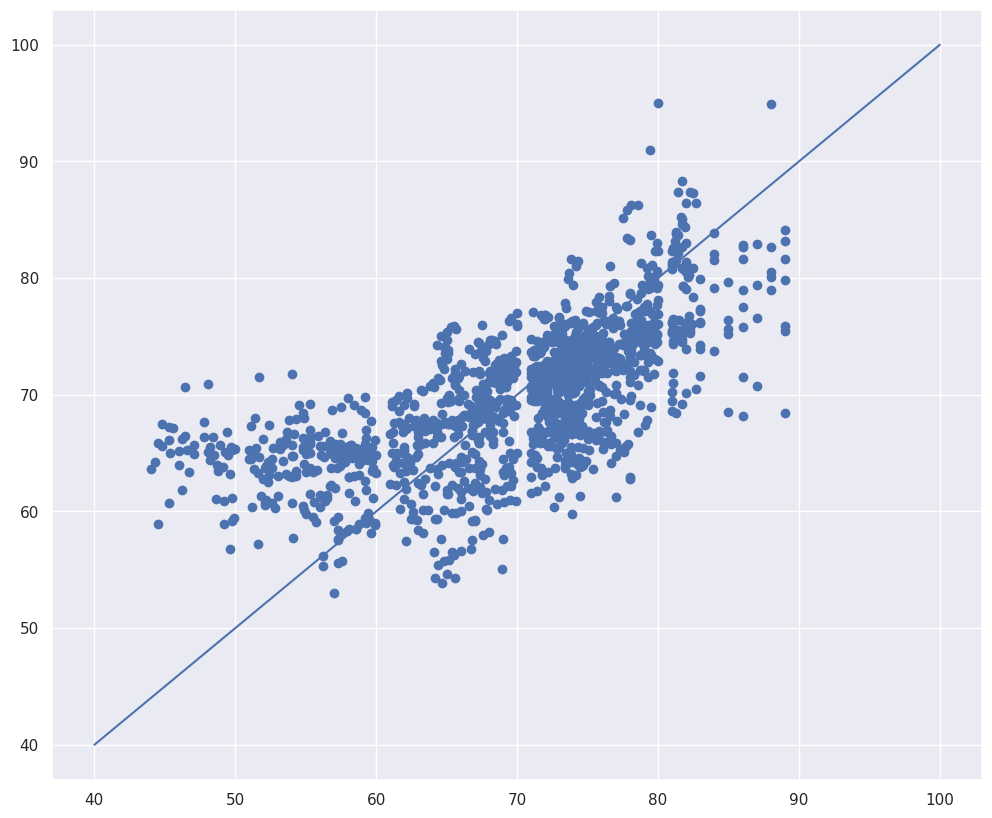

In [ ]:
y_hat_train = lin_model.predict(x_train)
plt.scatter(y_train, y_hat_train)
xy_range = [40, 100]
plt.plot(xy_range, xy_range)

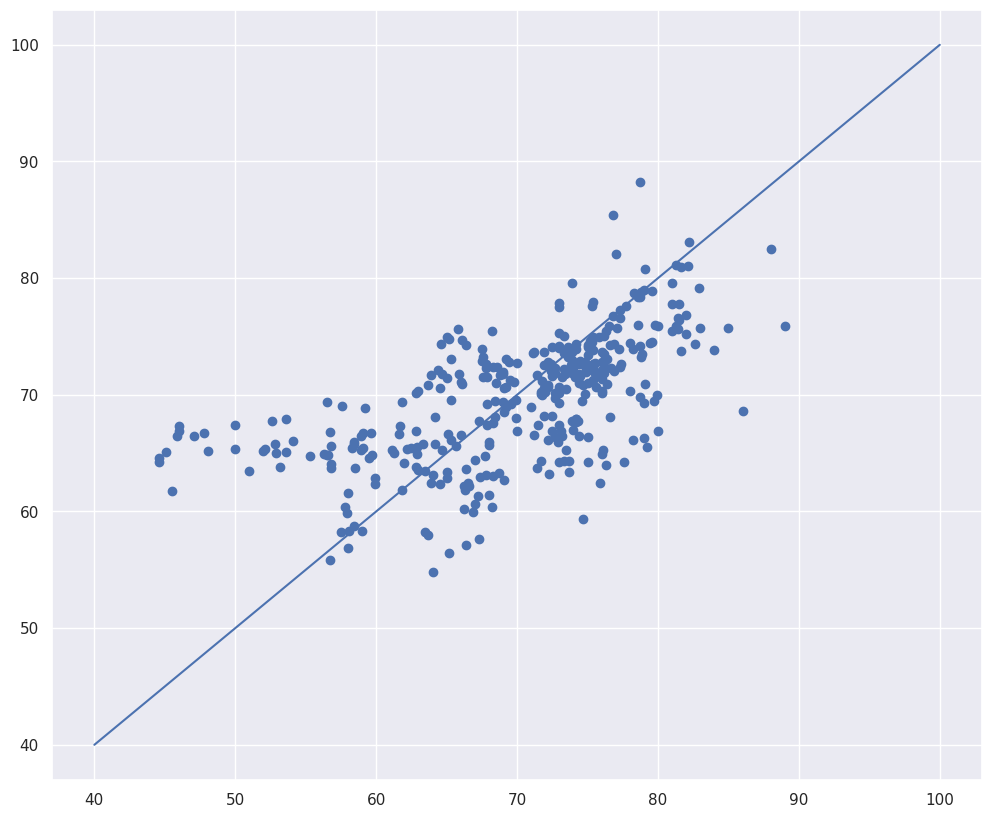

In [ ]:
y_hat_test = lin_model.predict(x_test)
plt.scatter(y_test, y_hat_test)
plt.plot(xy_range, xy_range)

In [ ]:
from sklearn.metrics import mean_squared_error
print('Mean absolute error', mean_squared_error(y_test,y_hat_test))

Mean absolute error 43.45656079821354


데이터 정규화

In [ ]:
from sklearn.preprocessing import normalize
n_x = normalize(x, axis = 0)

nxtrain, nxtest, y_train,y_test = train_test_split(n_x, y, test_size = 0.2)
lin_model.fit(nxtrain, y_train)

LinearRegression()

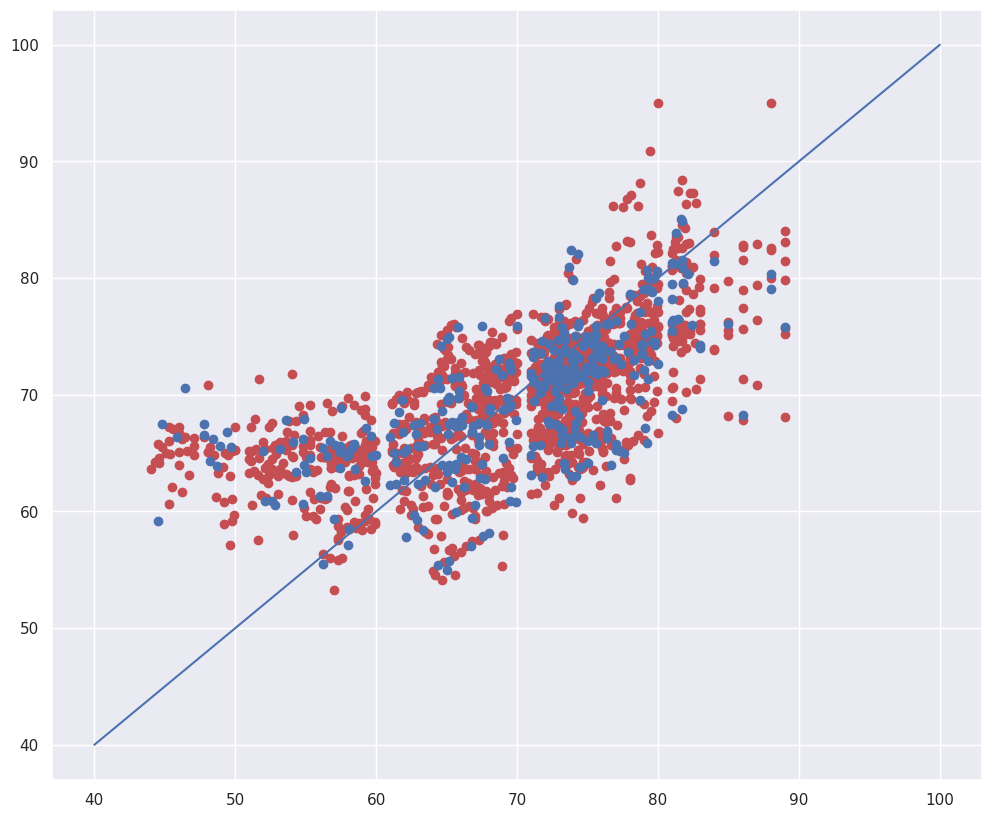

In [ ]:
y_hat_train = lin_model.predict(nxtrain)
y_hat_test = lin_model.predict(nxtest)
plt.scatter(y_train, y_hat_train, color = 'r')
plt.scatter(y_test, y_hat_test, color = 'b')
plt.plot(xy_range, xy_range)

In [ ]:
from sklearn.metrics import mean_squared_error
print('Mean absolute error', mean_squared_error(y_test,y_hat_test))

Mean absolute error 40.869452589574664


(array([[ 449., 1306.,   98.,    0.,    0.],
        [   0., 1765.,   72.,   11.,    5.],
        [ 179., 1674.,    0.,    0.,    0.],
        [ 452., 1399.,    2.,    0.,    0.],
        [   0., 1733.,  108.,    8.,    4.],
        [ 123., 1622.,   97.,   11.,    0.]]),
 array([-3.77113931, -0.94886312,  1.87341306,  4.69568924,  7.51796543,
        10.34024161]),
 <a list of 6 BarContainer objects>)

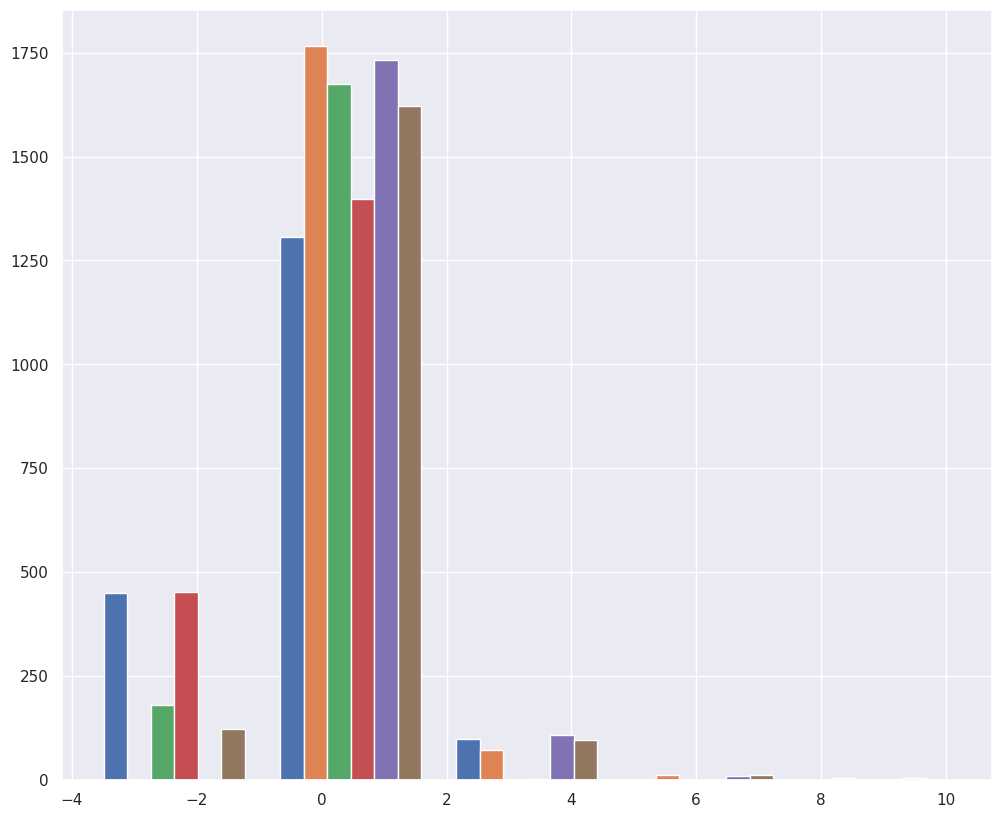

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
s_x = scaler.fit_transform(x)
sxtrain, sxtest, y_train, y_test = train_test_split(s_x, y, test_size=0.2)
plt.hist(s_x, bins = 5)

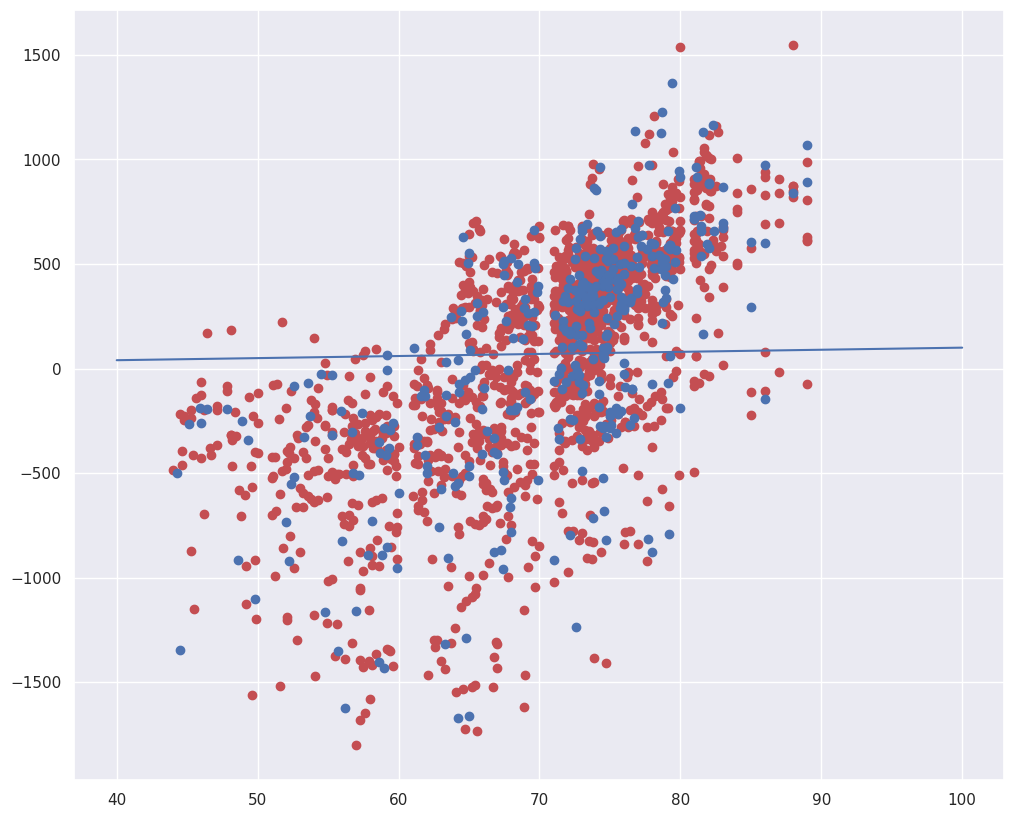

In [ ]:
y_hat_train = lin_model.predict(sxtrain)
y_hat_test = lin_model.predict(sxtest)
plt.scatter(y_train, y_hat_train, color = 'r')
plt.scatter(y_test, y_hat_test, color = 'b')
plt.plot(xy_range, xy_range)

In [ ]:
from sklearn.metrics import mean_squared_error
print('Mean absolute error', mean_squared_error(y_test,y_hat_test))

Mean absolute error 285274.2126449288
